___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df = pd.read_csv("store_sharing.csv")

In [3]:
type(df['timestamp'][0])

# timestamp feature'unun string tipinde olduğunu gördüm. İlerde bunu datetime tipine çevirmem gerekecek

str

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
# timestamp must be converted to datetime type,
# is_holiday and is_weekend must be converted to boolean type 

In [10]:
df.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

timestamp  cnt   t1  ...  is_holiday  is_weekend  season
0  2015-01-04 00:00:00  182  3.0  ...         0.0         1.0     3.0
1  2015-01-04 01:00:00  138  3.0  ...         0.0         1.0     3.0
2  2015-01-04 02:00:00  134  2.5  ...         0.0         1.0     3.0
3  2015-01-04 03:00:00   72  2.0  ...         0.0         1.0     3.0
4  2015-01-04 04:00:00   47  2.0  ...         0.0         1.0     3.0

[5 rows x 10 columns]

### 3.Check missing values and if there are any dublicate rows or not.

In [157]:
df.isna().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
year            0
month           0
day_of_month    0
day_of_week     0
hour            0
year-month      0
dtype: int64

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [60]:
# düşürmek için drop_duplicates, veriye bakmak için duplicated kullanıyoruz. Datasetimde dublikasyon var mı bakalım.

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17409    False
17410    False
17411    False
17412    False
17413    False
Length: 17414, dtype: bool

In [58]:
# aynı satır birden fazla var mı?

df.duplicated().value_counts()

# tüm satırlar False döndürdü. demek ki duplicate yok

False    17414
dtype: int64

False    17414
dtype: int64

In [14]:
df.isna().sum()

# df.isnull().sum()  (bu da .isna() ile aynıdır.)

"""
pandas'ta isna() ve isnull() aynı işlevi mi görür?

Evet bu iki metod pandas'ta tamamen aynı işlevi görür. Dokümanları bile aynıdır. 
Peki neden farklı isimlerdeki iki metod aynı şeyi yapıyor?  

Bunun nedeni pandasın DataFrame’lerinin R’nin DataFramelerine dayanmasıdır. 
R’de “NA” ve “NULL” iki ayrı şeydir. “NA” yalnızca mantıksal anlamda kullanılırken, 
her ikisi de eksik veya tanımsız değerleri temsil etmek için kullanılırlar. 

Ancak pandas, “NA” ve “NULL” değerleri olmayan numpy’ın üstüne kuruludur. 
Bunların yerine numpy’ın “NaN” değerleri vardır ki “SAYI DEĞİL” anlamına gelir. 
Sonuç olarak pandas’ta NaN değerleri kullanılır.

KISACASI:
Numpy’ın NaN değerlerini tespit etmek için np.isnan()
Pandas’ın NaN değerlerini tespit etmek için ya .isna() ya da .isnull() kullanıyoruz.
"""

# elimdeki verilerde hiç boş veri olmadığını gördüm. dolayısıla dropna ile bunları düşürmeme gerek yok

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

<AxesSubplot:xlabel='season', ylabel='count'>

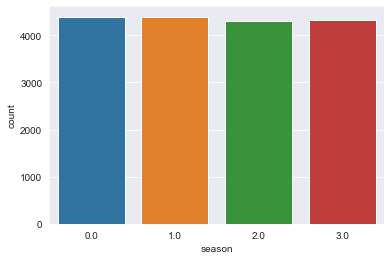

In [62]:
# season

sns.countplot("season", data=df)

# bunlar seoson'lara göre kayıt sayısını gösteriyor.

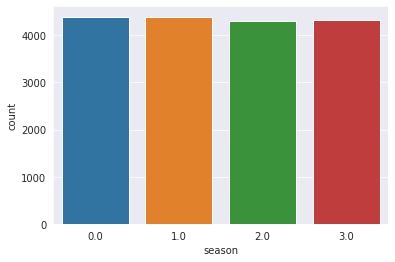

In [ ]:
# season


<AxesSubplot:xlabel='is_holiday', ylabel='count'>

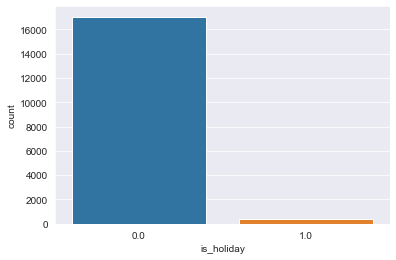

In [63]:
# is_holiday

sns.countplot("is_holiday", data=df)

# bunlar tatil günleri olup olmaması durumlarına göre kayıt sayısını gösteriyor.

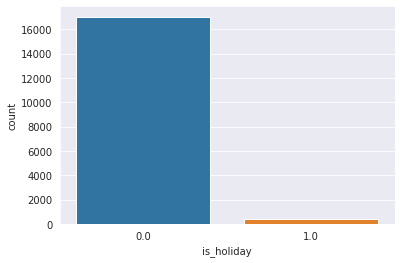

In [ ]:
# is_holiday


<AxesSubplot:xlabel='is_weekend', ylabel='count'>

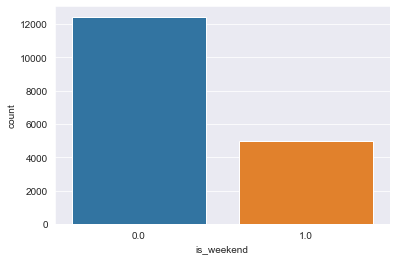

In [66]:
sns.countplot("is_weekend", data=df)

# hafta sonu olup olmama durumuna göre kayıt sayısını gösteriyor.

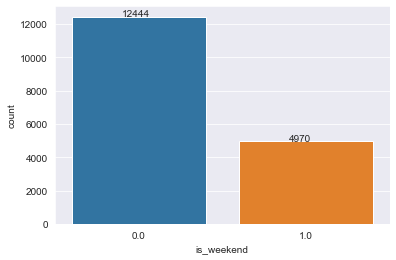

In [164]:
# annotate kullanarak değerleri barların üzerine yazdıralım.

ax = sns.countplot("is_weekend", data=df);  # bu plotu bir axes'e atadık ki onun patch'ini alıp for döngüsüne sokabilelim.

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+20));
    
# annotate'in birinci parametresi barın üstüne girilecek değer 
# burada yükseklik değerini stringe çevirip yazdırdık, integer olarak da bırakabilirdik. duruma göre..
# ikinci parametre nümerik değer olarak stringin yazılacağı yeri x (yatay) ve height (dikey) olarak gösteriyor

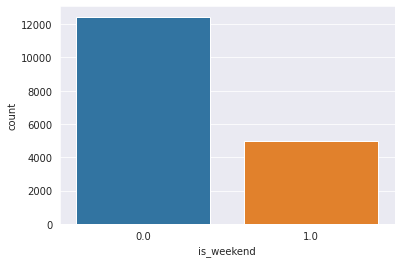

In [ ]:
# is_weekend


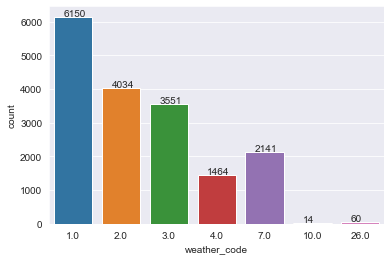

In [73]:
ax = sns.countplot("weather_code", data=df);

for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x()+0.2, p.get_height()+20)    );


# patches --> her bir çubuk bir patch'tir

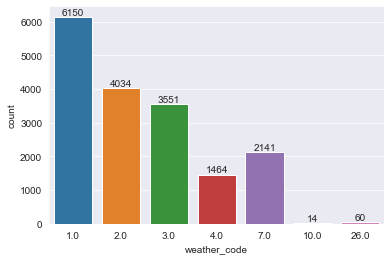

In [72]:
# patchlerin üzerine değerlerini yazdırmak için alternatif yöntem: 

sns.countplot(data = df, x = "weather_code");

for index, value in enumerate(df.weather_code.value_counts().sort_index()):
    plt.text(index, value, str(value), ha="center", va="bottom")
    
# value_counts value'lara göre sıralıyor. bu yüzden doğru değer doğru patch üzerinde olması için patch'leri index'e göre sort ettik.


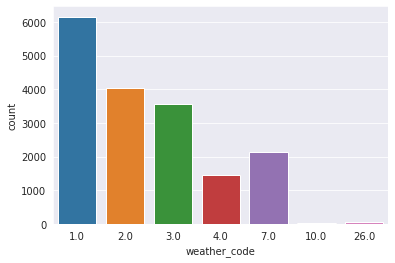

In [ ]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [79]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [5]:
df.timestamp = pd.to_datetime(df.timestamp)

# timestamp kolonunun kendi içinde dolaşacak ve her birini datetime'a çevirecek. (datetime'a çevirerek yine kendine atadık.)

In [6]:
df.set_index("timestamp", inplace=True)
df.head()

# timestamp sütununu index yaptım.

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0

cnt   t1   t2  ...  is_holiday  is_weekend  season
timestamp                           ...                                
2015-01-04 00:00:00  182  3.0  2.0  ...         0.0         1.0     3.0
2015-01-04 01:00:00  138  3.0  2.5  ...         0.0         1.0     3.0
2015-01-04 02:00:00  134  2.5  2.5  ...         0.0         1.0     3.0
2015-01-04 03:00:00   72  2.0  2.0  ...         0.0         1.0     3.0
2015-01-04 04:00:00   47  2.0  0.0  ...         0.0         1.0     3.0

[5 rows x 9 columns]

- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [7]:
df['year'] = df.index.year

# index'in year kısımlarını alıp year isminde bir sütun oluşturdum.

In [8]:
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["hour"] = df.index.hour

df["year-month"]  = df.index.strftime("%Y-%m") # verileri yıl-ay şeklinde getirecek

In [82]:
df.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  year  month  \
timestamp                                                          
2015-01-04 00:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 01:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 02:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 03:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 04:00:00         0.0         1.0     3.0  2015      1   

                     day_of_month  day_of_week  hour year-month  
timestamp                                                        
2015-01-04 00:00:00             4            6     0    2015-01  
2015-01-04 01:00:00             4            6     1    2015-01  
2015-01-04 02:00:00             4            6     2    2015-01  
2015-01-04 03:00:00             4            6     3    2015-01  
2015-01-04 04:00:00             4            6     4    2015-01

In [9]:
df.head()

cnt   t1   t2  ...  day_of_month  day_of_week  hour
timestamp                           ...                                 
2015-01-04 00:00:00  182  3.0  2.0  ...             4            6     0
2015-01-04 01:00:00  138  3.0  2.5  ...             4            6     1
2015-01-04 02:00:00  134  2.5  2.5  ...             4            6     2
2015-01-04 03:00:00   72  2.0  2.0  ...             4            6     3
2015-01-04 04:00:00   47  2.0  0.0  ...             4            6     4

[5 rows x 15 columns]

### 7.Visualize the correlation with a heatmap

<AxesSubplot:>

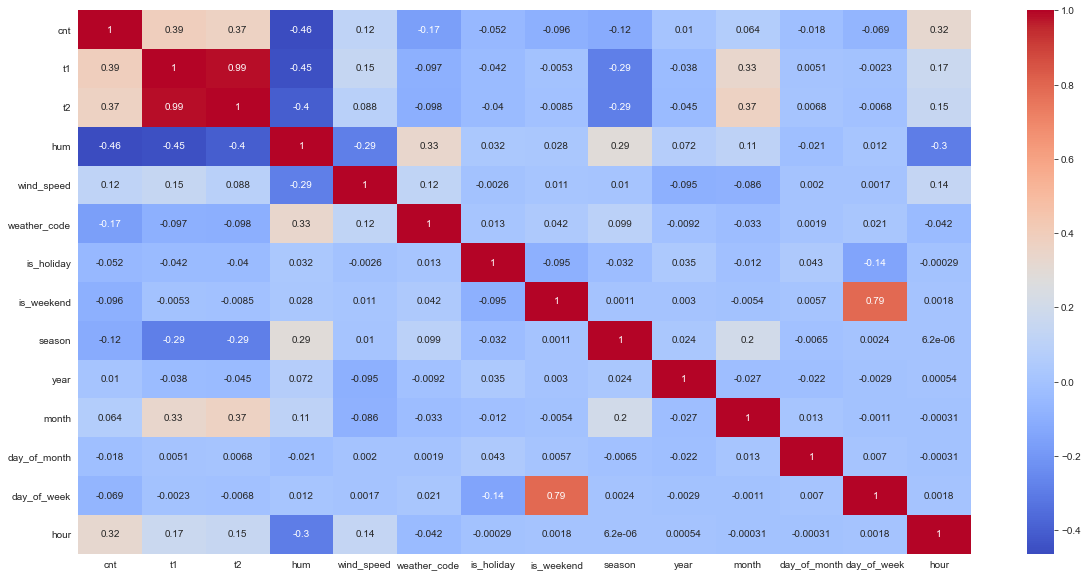

In [85]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

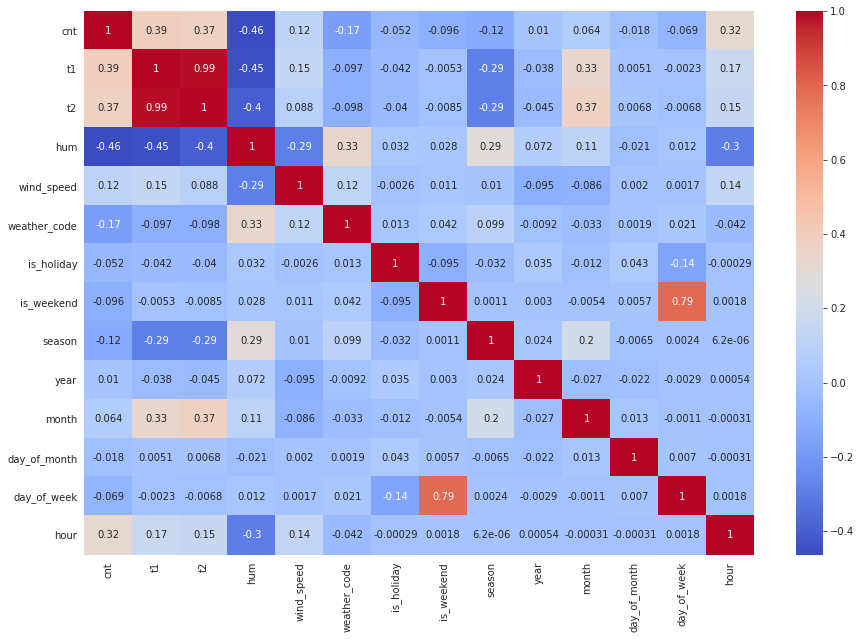

In [ ]:
# for all variables 


<AxesSubplot:>

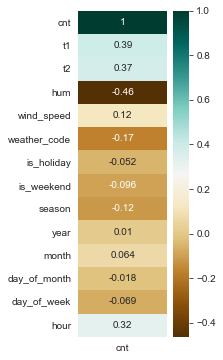

In [86]:
plt.figure(figsize=(2,6))

sns.heatmap(df.corr()[["cnt"]], cmap="BrBG", annot=True)

<AxesSubplot:>

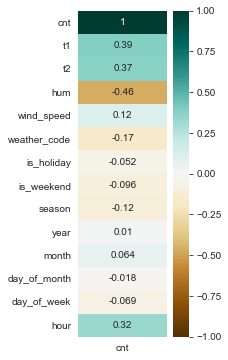

In [95]:
plt.figure(figsize=(2,6))

sns.heatmap(df.corr()[["cnt"]], cmap="BrBG", annot=True, vmin=-1, vmax=1)

# vmin=-1 ile renk scale'ini -1 ile 1 arasına ayarladım.

<AxesSubplot:>

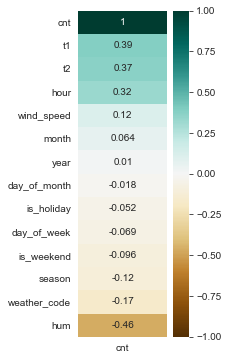

In [94]:
plt.figure(figsize=(2,6))

sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt", ascending=False), cmap="BrBG", 
            annot=True, vmin=-1, vmax=1)

# corr değerlerini küçükten büyüğe sıraladık

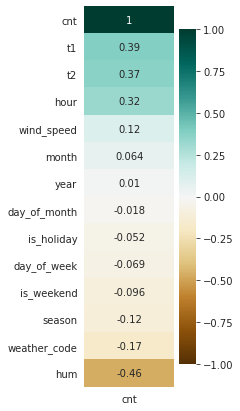

In [ ]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

In [96]:
# with pandas

df.corr()[["cnt"]].sort_values(by="cnt", ascending=True)

cnt
cnt           1.000000
t1            0.388798
t2            0.369035
hour          0.324423
wind_speed    0.116295
month         0.063757
year          0.010046
day_of_month -0.017887
is_holiday   -0.051698
day_of_week  -0.068688
is_weekend   -0.096499
season       -0.116180
weather_code -0.166633
hum          -0.462901

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

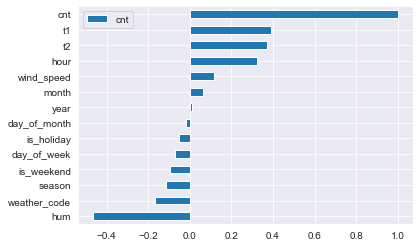

In [105]:
#with pandas
plt.figure(figsize=(10,6))
            


<Figure size 720x432 with 0 Axes>

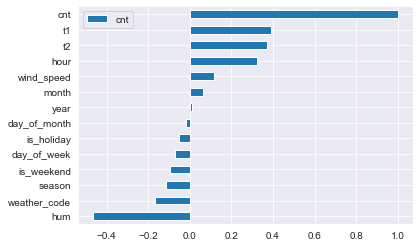

In [12]:
#with pandas

plt.figure(figsize=(10,6))
df.corr().cnt.sort_values().plot.barh()

# df.corr()[["cnt"]].sort_values(by="cnt", ascending=True).plot.barh()

plt.show()

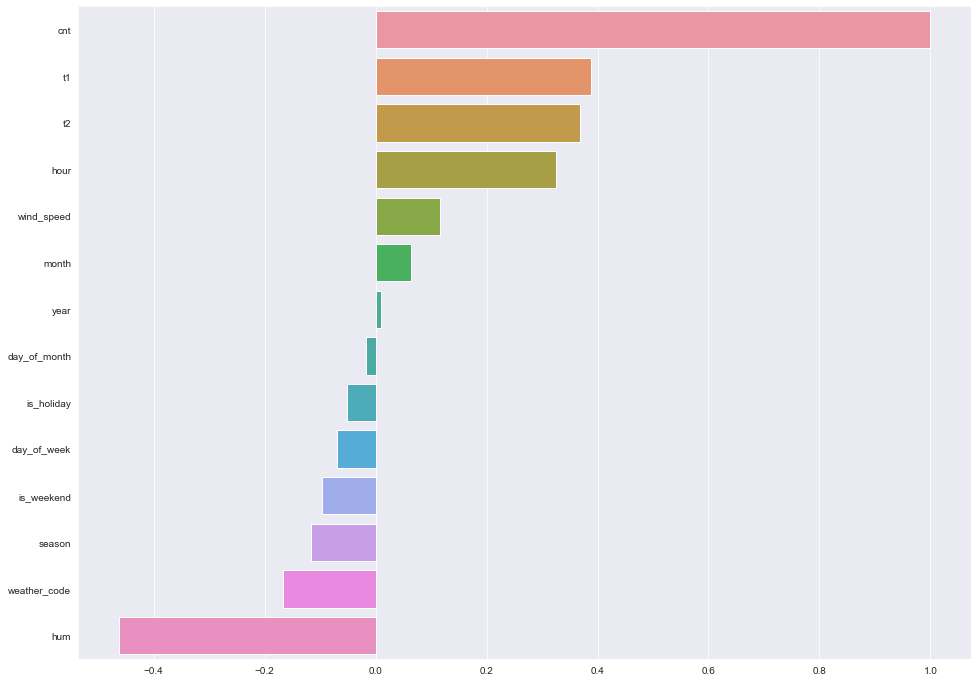

In [100]:
#with seaborn

plt.figure(figsize=(16,12))
sns.barplot(x = df.corr().cnt.sort_values(ascending=False).values, 
            y=df.corr().cnt.sort_values(ascending=False).index);

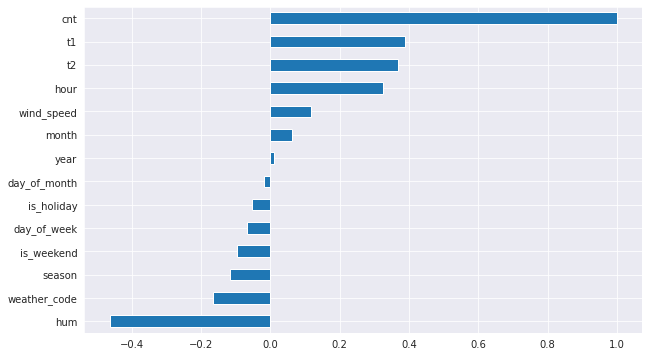

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

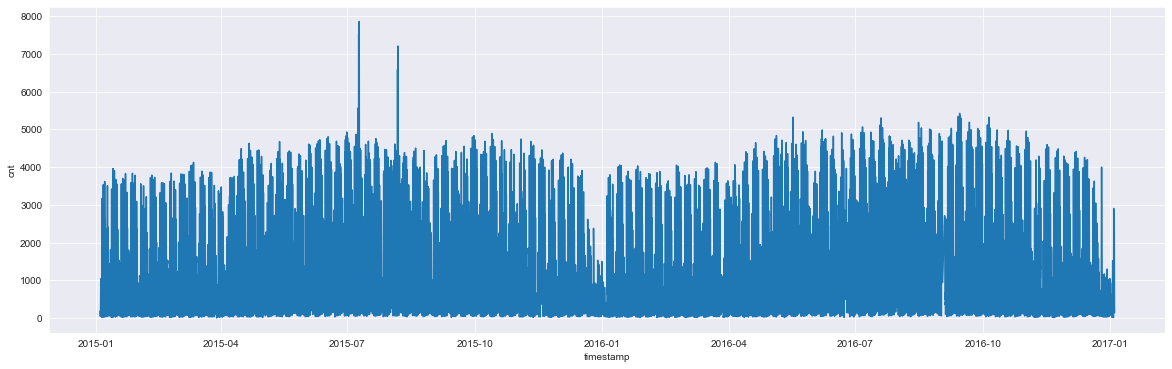

In [107]:
# seaborn

plt.figure(figsize=(20,6))

sns.lineplot(x=df.index, y="cnt", data=df);

# girdi yapılan bilgi: pik yapan yerlerde devlet bisiklet kullanmayı teşvik etmiş. o yüzden oralarda outlier oluşmuş.

<AxesSubplot:xlabel='timestamp'>

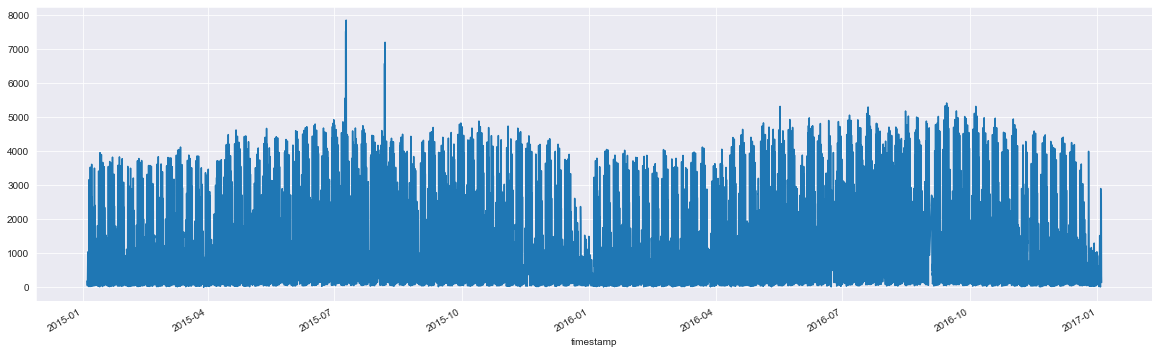

In [14]:
# matplotlib 

plt.figure(figsize=(20,6))

df.cnt.plot.line()

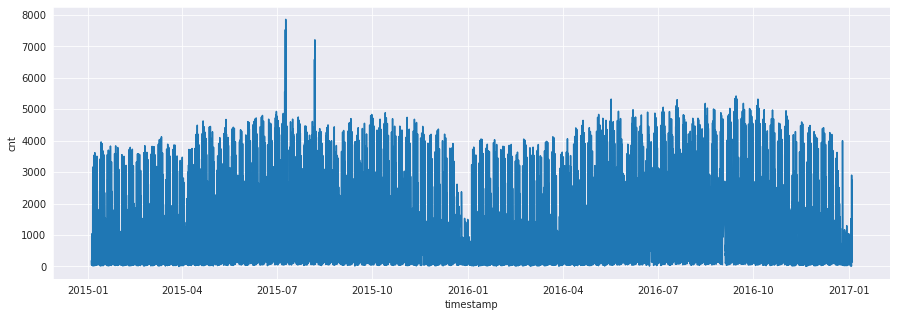

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [108]:
df.head(1)

cnt   t1   t2   hum  wind_speed  weather_code  is_holiday  \
timestamp                                                               
2015-01-04  182  3.0  2.0  93.0         6.0           3.0         0.0   

            is_weekend  season  year  month  day_of_month  day_of_week  hour  \
timestamp                                                                      
2015-01-04         1.0     3.0  2015      1             4            6     0   

           year-month  
timestamp              
2015-01-04    2015-01

In [109]:
# önce aylara göre cnt sayılarının toplamını göreyim

df.groupby("year-month").cnt.sum()


year-month
2015-01     546639
2015-02     543594
2015-03     695934
2015-04     831582
2015-05     895413
2015-06    1033252
2015-07    1120687
2015-08    1033951
2015-09     892478
2015-10     865046
2015-11     677332
2015-12     602838
2016-01     582518
2016-02     592910
2016-03     656527
2016-04     768845
2016-05    1001935
2016-06     933878
2016-07    1165527
2016-08    1137314
2016-09     998619
2016-10     935706
2016-11     703859
2016-12     651908
2017-01      37680
Name: cnt, dtype: int64

In [110]:
df_sum = pd.DataFrame(df.groupby("year-month").cnt.sum())

# yukardaki bilgilerden oluşan df_sum adında yeni bir dataframe oluşturdum.
# şimdi bu dataframe'i kullanarak aylara göre cnt sayılarını plotlayalım.

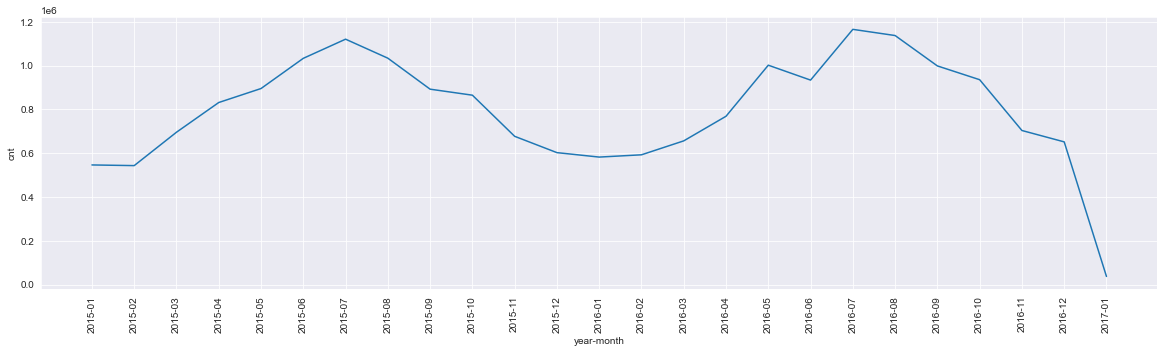

In [115]:
# with lineplot 

plt.figure(figsize=(20,5))

sns.lineplot(x="year-month",y="cnt", data = df_sum)
plt.xticks(rotation=90);


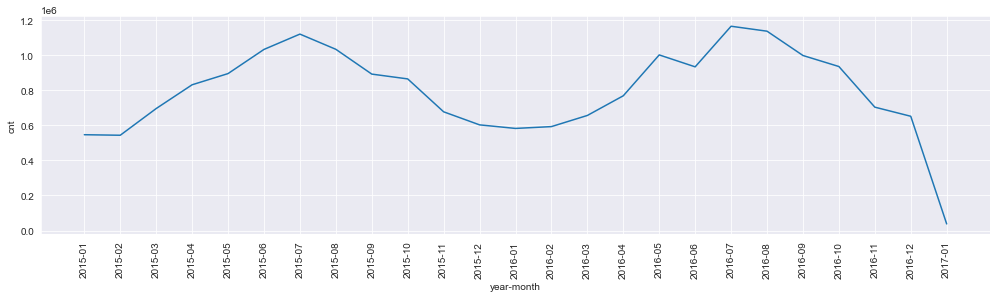

In [19]:
# Emir hocanın alternatif kodu:



plt.figure(figsize=(17,4))

sns.lineplot(data = df, x = "year-month", y = "cnt", ci = None, estimator = sum)
plt.xticks(rotation = 90)
plt.show()

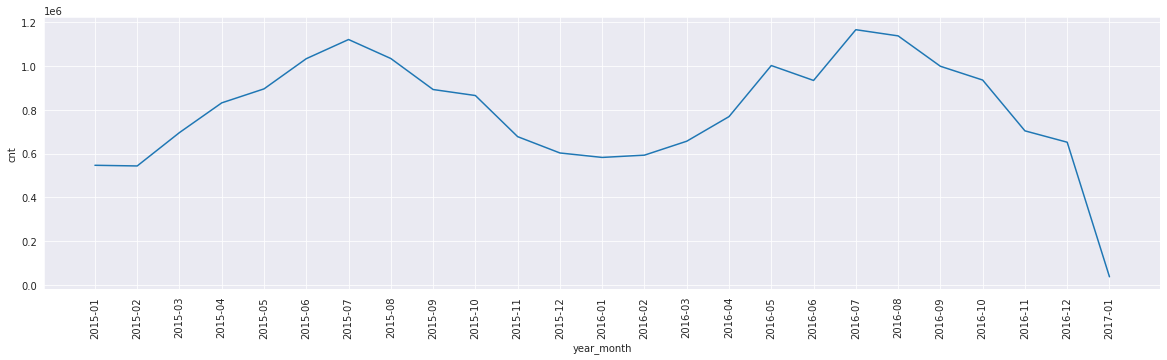

In [ ]:
# with lineplot


<AxesSubplot:xlabel='month', ylabel='cnt'>

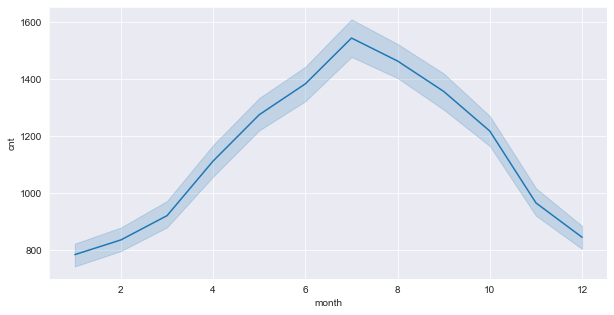

In [116]:
# with lineplot

plt.figure(figsize=(10,5))
sns.lineplot(x = "month", y = "cnt", data=df)

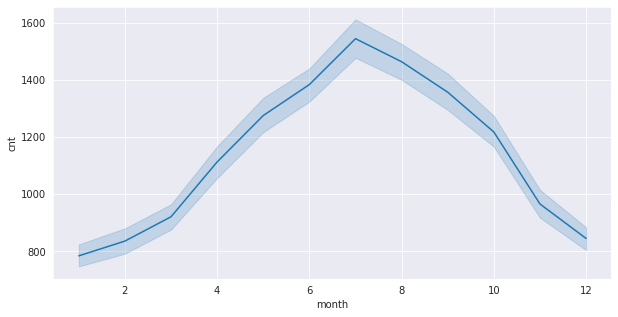

In [ ]:
# with lineplot


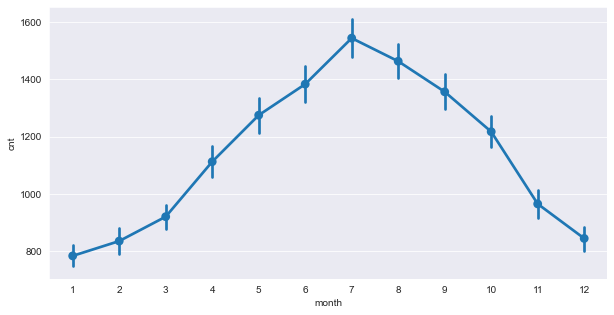

In [118]:
# with pointplot

plt.figure(figsize=(10,5))
sns.pointplot(x = "month", y = "cnt", data=df);

# lineplot ile aynı değerleri gösteriyor.

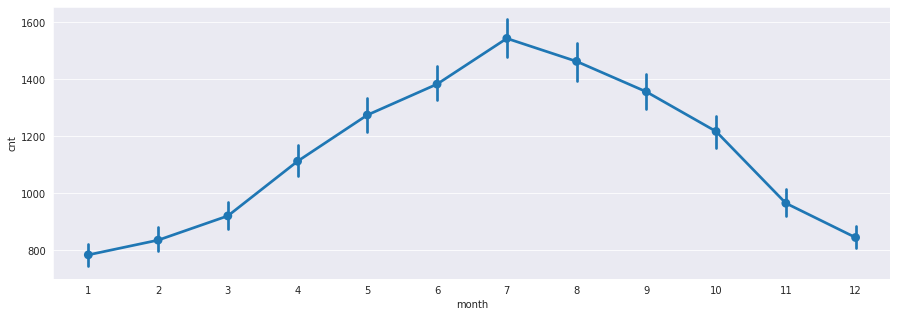

In [ ]:
# with pointplot


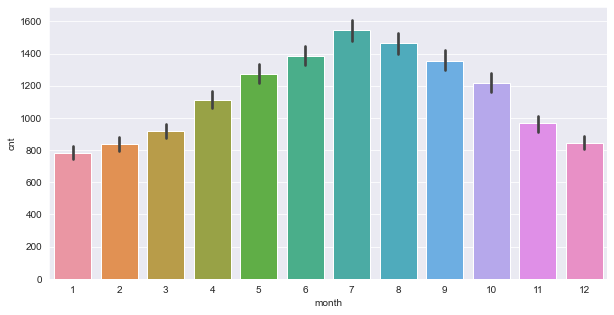

In [119]:
# with barplot

plt.figure(figsize=(10,5))
sns.barplot(x = "month", y = "cnt", data=df, ci=95);

# güven aralığı 95 olarak kabul görmüştür. biz de 95 girdik.

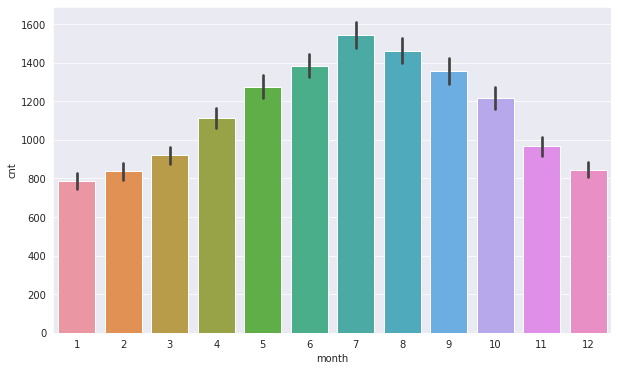

In [ ]:
# with barplot


### 11.Plot bike shares by hours on (holidays, weekend, season)

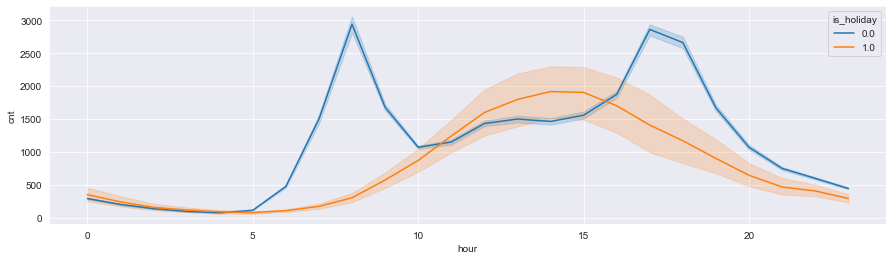

In [120]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(15,4))
sns.lineplot(x = "hour", y = "cnt", data=df, hue = "is_holiday");

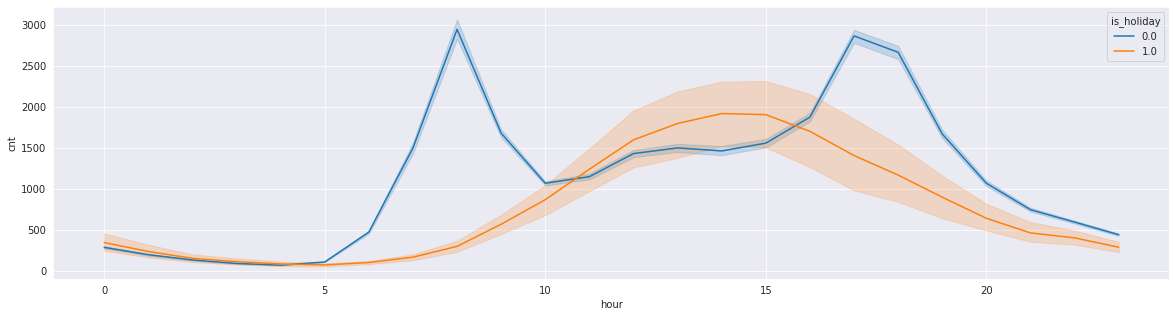

In [ ]:
# with lineplot (*whether it is a holiday or not*)


In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(x = "hour", y = "cnt", data=df, hue = "is_holiday");

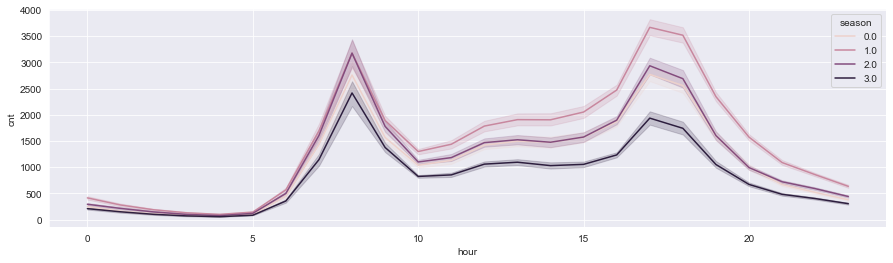

In [121]:
# with lineplot (*You may want to see seasonal breakdowns*)

plt.figure(figsize=(15,4))
sns.lineplot(x = "hour", y = "cnt", data=df, hue = "season");

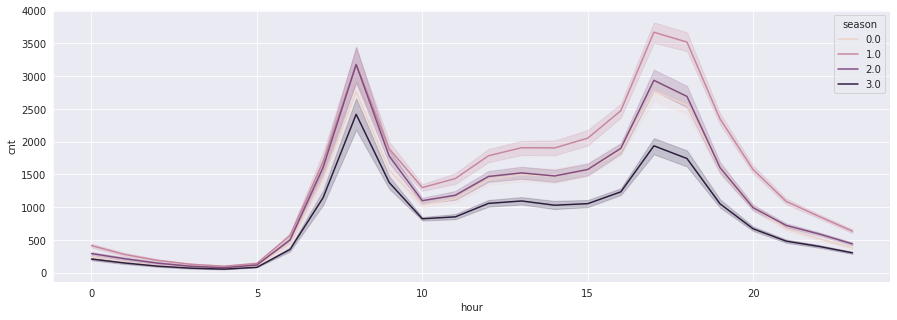

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


<AxesSubplot:xlabel='hour', ylabel='cnt'>

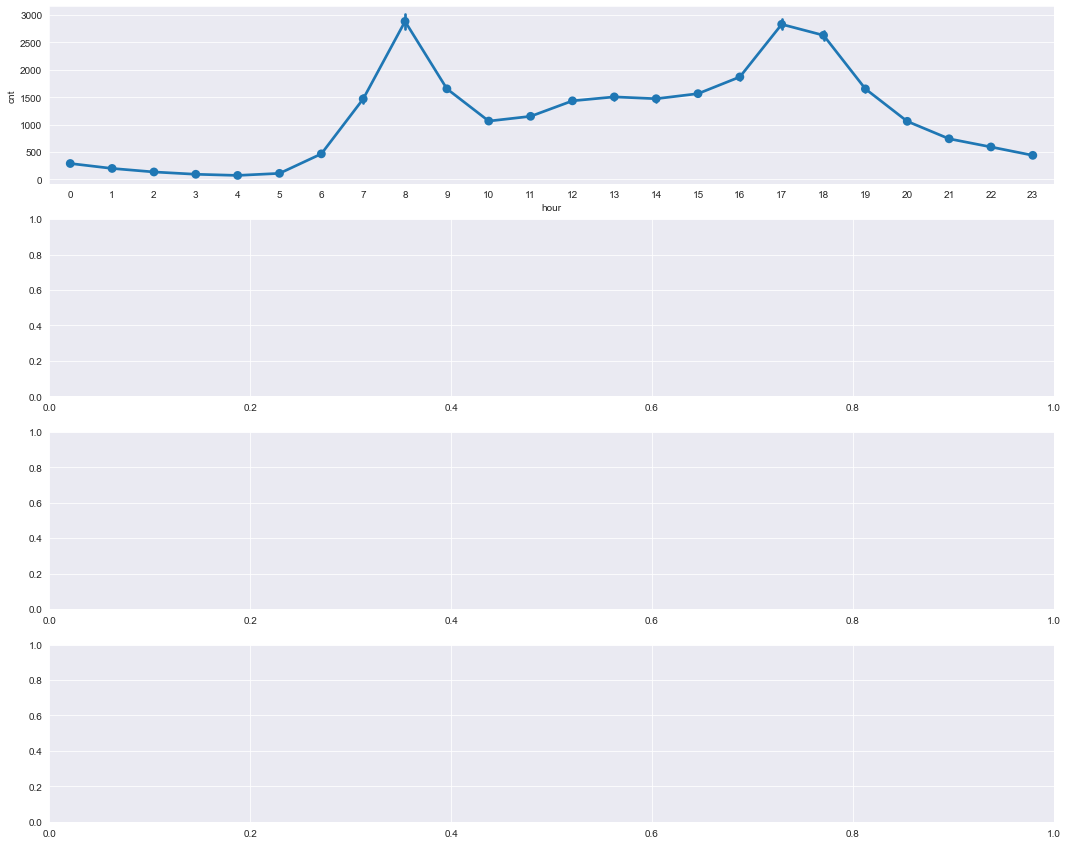

In [122]:
# with pointplot

fig, ax = plt.subplots(nrows = 4, figsize = (18,15))  # plt.subplots(4,1, figsize=(18,4)) - nrows ve ncols defaultu 1!!

sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[0])  # hepsinde x hour ve y cnt

plt.tight_layout()

# önce 4 ax oluştuğunu ve birincideki plotu görelim.

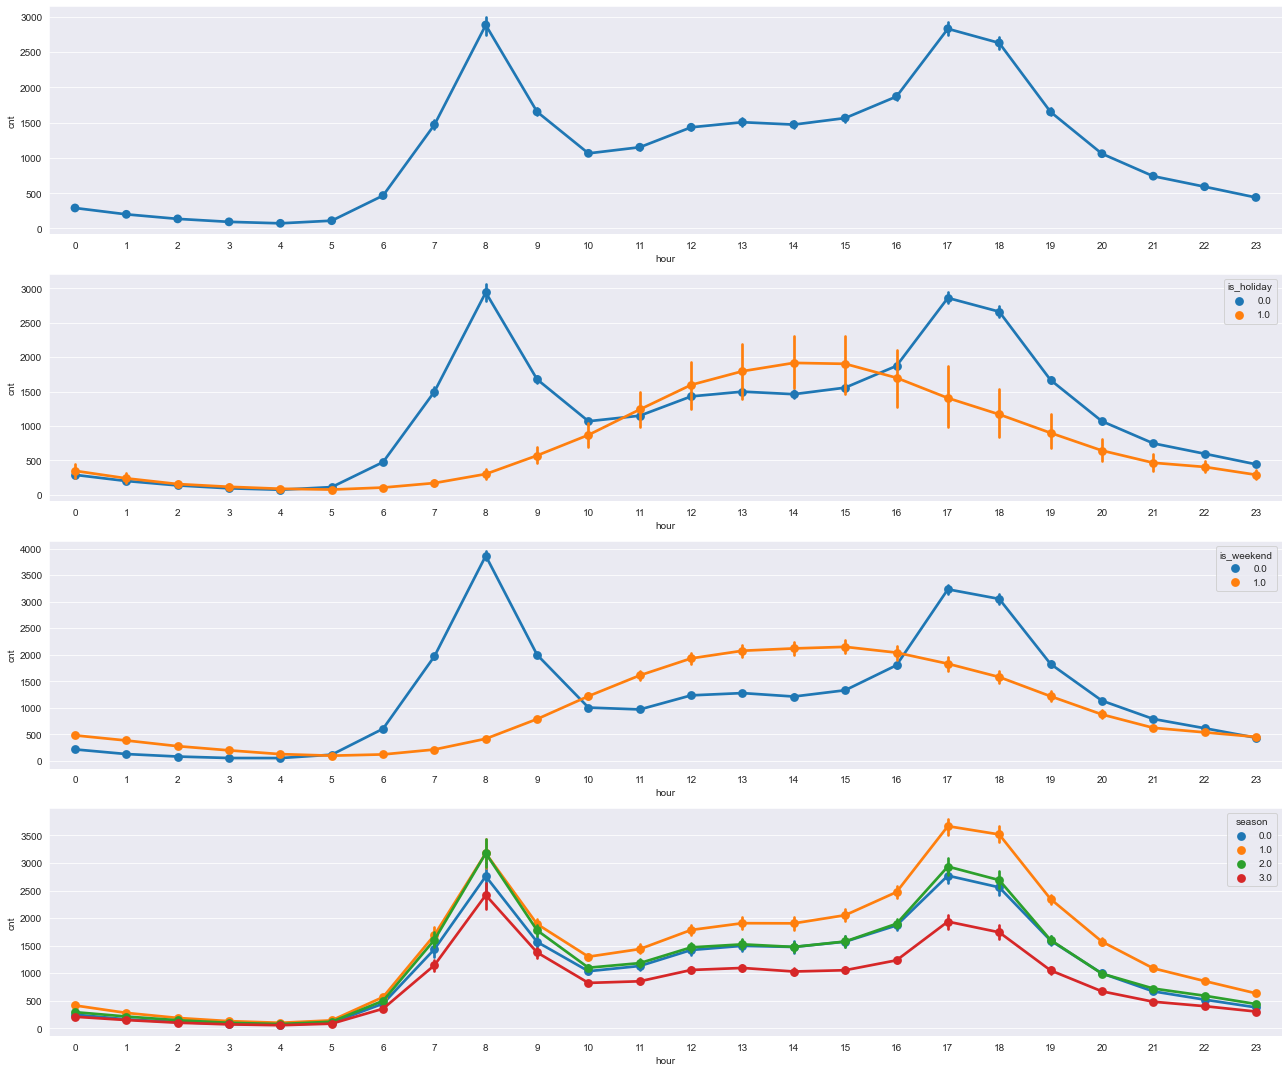

In [125]:
fig, ax = plt.subplots(nrows = 4, figsize = (18,15)) # nrows ve ncols default olarak 1 olduğundan ncols değeri girilmedi.

sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[0])
sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[1],
             hue = "is_holiday")
sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[2],
             hue = "is_weekend")
sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[3],
             hue = "season")
plt.tight_layout()

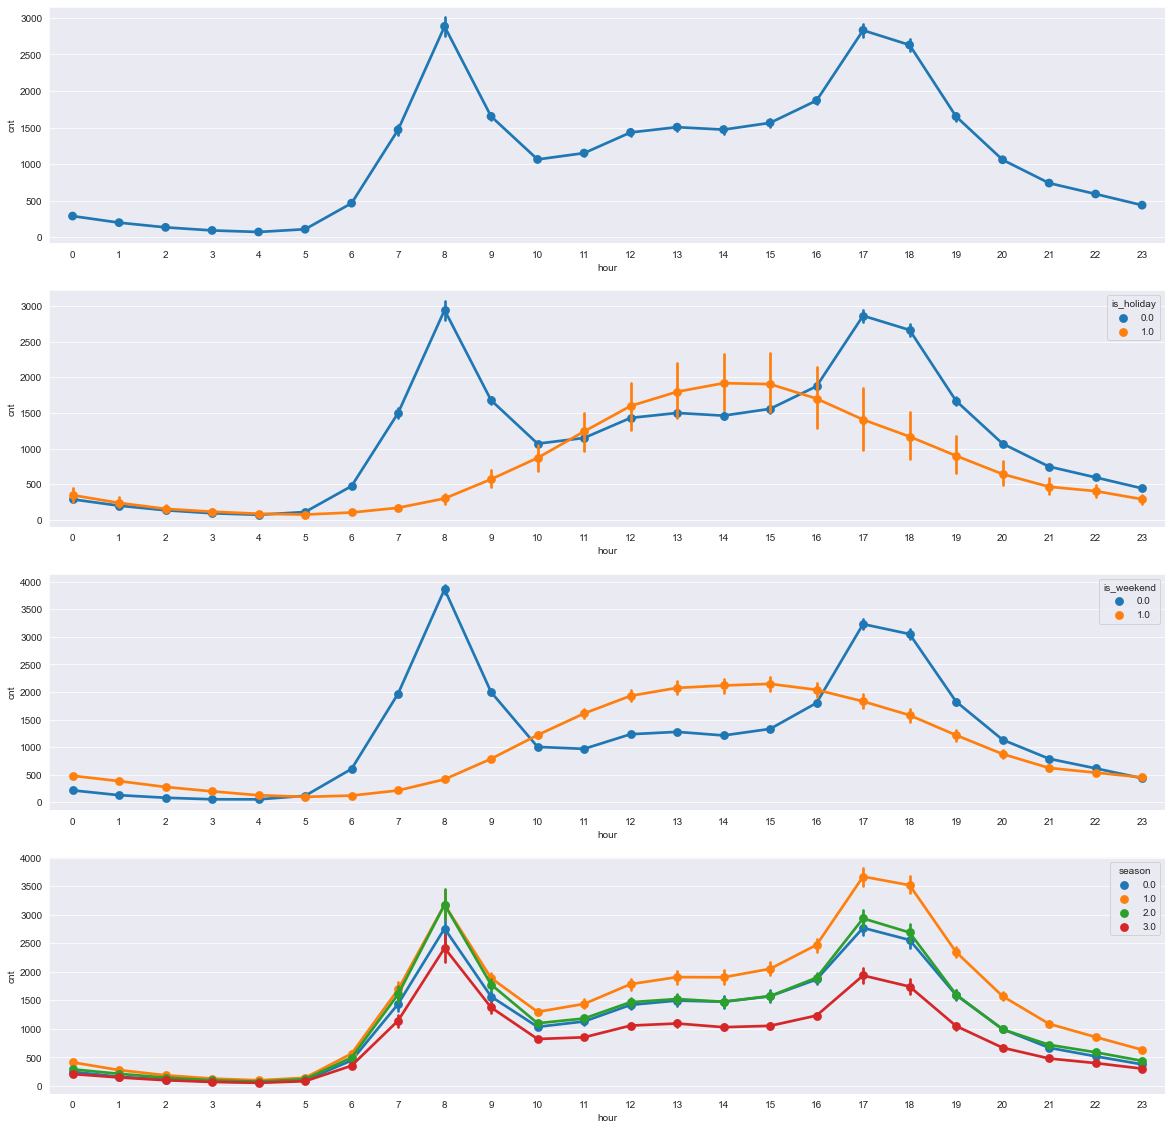

In [126]:
# C8329 Joseph hocanın alternetif kodu:

plt.figure(figsize=(20,20))

plt.subplot(4,1,1)            #  4,1,1 --> nrows, ncols, index 
sns.pointplot(df.hour, df.cnt);

plt.subplot(4,1,2)
sns.pointplot(df.hour, df.cnt, hue = df.is_holiday);

plt.subplot(4,1,3)
sns.pointplot(df.hour, df.cnt, hue = df.is_weekend);

plt.subplot(4,1,4)
sns.pointplot(df.hour, df.cnt, hue = df.season);

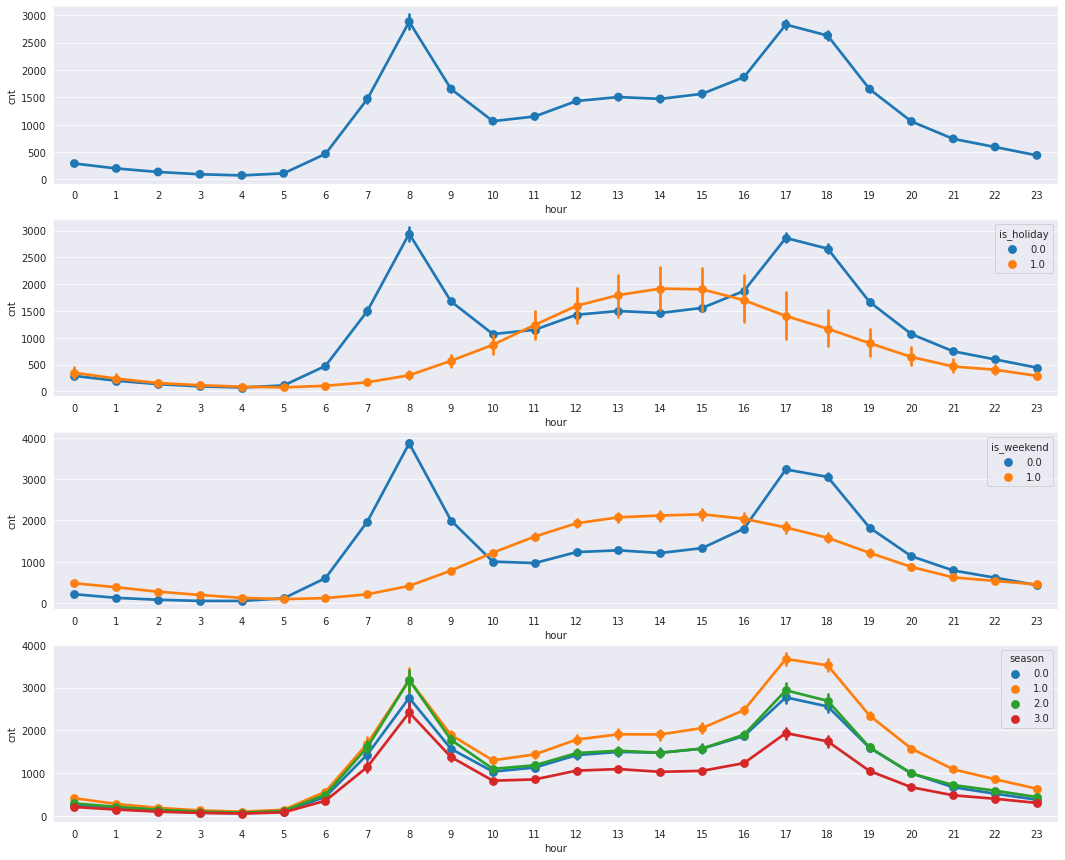

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

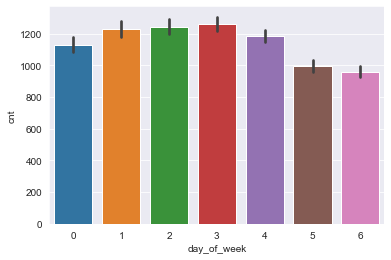

In [127]:
# with barplot

sns.barplot(x="day_of_week", y="cnt", data=df)

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

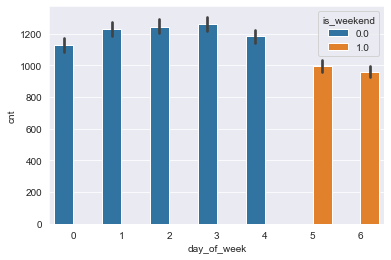

In [128]:

sns.barplot(x="day_of_week", y="cnt", data=df, hue = "is_weekend")

# önemli bir ayrıntı:
# haftanın günleri içerisinde hafta içi ve hafta sonu ikisi de olduğundan, hue olarak is_weekend eklesek de barları parçalamadı! 
# sadece hafta sonunu farklı renk gösterdi.

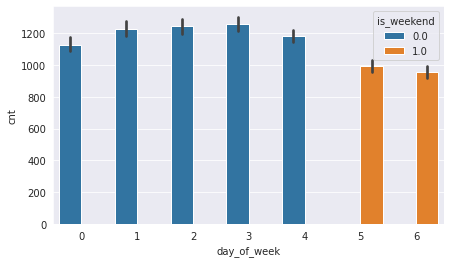

In [ ]:
# with barplot


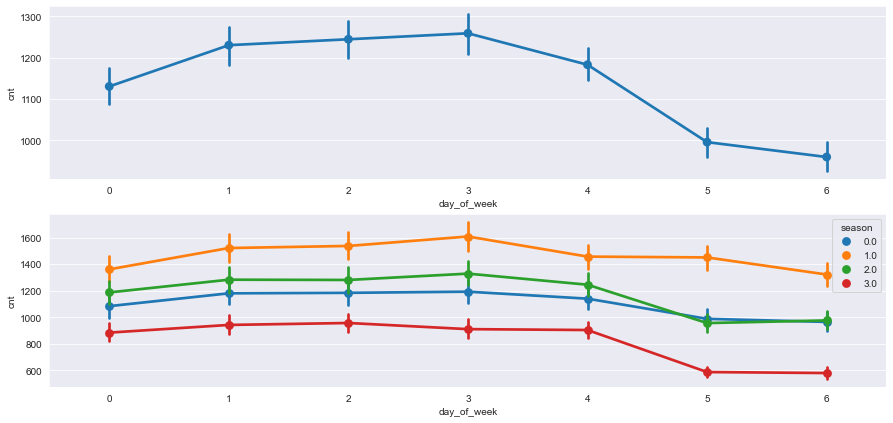

In [24]:
# şimdi günleri hem genel olarak hem de mevsimlere göre iki ayrı axes'ta görelim ve kıyaslayalım.

fig, ax = plt.subplots(2,1, figsize=(15,7))

sns.pointplot(data=df, x="day_of_week", y = "cnt", ax = ax[0])
sns.pointplot(data=df, x="day_of_week", y = "cnt", ax = ax[1], hue = "season")

plt.show()

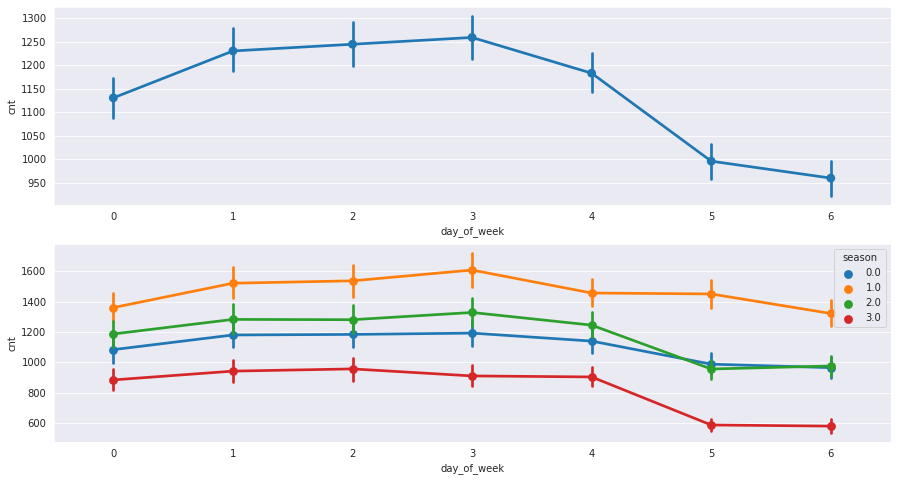

In [ ]:
# with pointplot


### 13.Plot bike shares by day of month

In [29]:
# önce day_of_month a göre gruplayacağım. sonra cnt'sinin ortalamasını alacağım

df.groupby("day_of_month").cnt.mean()

day_of_month
1     1077.455652
2     1088.117754
3     1127.602837
4     1144.492174
5     1140.772727
6     1211.227431
7     1194.151832
8     1222.696491
9     1261.260870
10    1157.453913
11    1203.618467
12    1166.952212
13    1139.221441
14    1123.670139
15    1175.629565
16    1140.871080
17    1182.311847
18    1178.552632
19    1153.147826
20    1115.667832
21    1125.729167
22    1127.717014
23    1173.994792
24    1054.147950
25    1190.786087
26    1081.516637
27    1130.681979
28    1062.750871
29    1079.680581
30    1156.406844
31     968.187311
Name: cnt, dtype: float64

In [31]:
pd.DataFrame(df.groupby("day_of_month").cnt.mean())

cnt
day_of_month             
1             1077.455652
2             1088.117754
3             1127.602837
4             1144.492174
5             1140.772727
6             1211.227431
7             1194.151832
8             1222.696491
9             1261.260870
10            1157.453913
11            1203.618467
12            1166.952212
13            1139.221441
14            1123.670139
15            1175.629565
16            1140.871080
17            1182.311847
18            1178.552632
19            1153.147826
20            1115.667832
21            1125.729167
22            1127.717014
23            1173.994792
24            1054.147950
25            1190.786087
26            1081.516637
27            1130.681979
28            1062.750871
29            1079.680581
30            1156.406844
31             968.187311

In [134]:
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

# mean den dolayı float olacağından tipini int yaptım. sadece virgülden önceki kısmını alacağından yuvarlamış da olduk

day_of_month    1     2     3     4     5     6     7     8     9     10  ...  \
cnt           1077  1088  1127  1144  1140  1211  1194  1222  1261  1157  ...   

day_of_month    22    23    24    25    26    27    28    29    30   31  
cnt           1127  1173  1054  1190  1081  1130  1062  1079  1156  968  

[1 rows x 31 columns]

In [46]:
# bir alttaki kodda kullanılmak üzere pivot_table yapalım.

pd.pivot_table(df, index="day_of_month")

cnt  day_of_week       hour        hum  is_holiday  \
day_of_month                                                               
1             1077.455652     3.125217  11.480000  72.046957    0.041739   
2             1088.117754     2.608696  11.500000  73.251812    0.086957   
3             1127.602837     3.042553  11.627660  73.371454    0.042553   
4             1144.492174     3.080000  11.502609  72.579130    0.041739   
5             1140.772727     2.909091  11.545455  72.850524    0.000000   
6             1211.227431     3.041667  11.500000  71.203125    0.041667   
7             1194.151832     2.870855  11.472949  70.842059    0.000000   
8             1222.696491     3.031579  11.594737  71.478070    0.000000   
9             1261.260870     2.831304  11.507826  71.724348    0.000000   
10            1157.453913     3.253913  11.483478  72.730435    0.000000   
11            1203.618467     3.080139  11.461672  72.360627    0.000000   
12            1166.952212     2.876106  11.653097  72.692035    0.000000   
13            1139.221441     3.068541  11.425308  74.688928    0.000000   
14            1123.670139     2.875000  11.500000  73.523438    0.000000   
15            1175.629565     3.005217  11.483478  74.103478    0.000000   
16            1140.871080     2.839721  11.461672  74.286585    0.000000   
17            1182.311847     3.257840  11.461672  71.628920    0.000000   
18            1178.552632     3.094737  11.594737  72.032456    0.000000   
19            1153.147826     2.913043  11.502609  72.274783    0.000000   
20            1115.667832     3.054196  11.493007  74.559441    0.000000   
21            1125.729167     2.875000  11.500000  72.433160    0.000000   
22            1127.717014     3.000000  11.500000  72.710938    0.000000   
23            1173.994792     2.833333  11.500000  70.191840    0.000000   
24            1054.147950     3.229947  11.620321  71.234403    0.000000   
25            1190.786087     3.078261  11.480000  70.890435    0.125217   
26            1081.516637     2.898424  11.416813  73.027145    0.042032   
27            1130.681979     2.989399  11.606007  71.092756    0.042403   
28            1062.750871     2.874564  11.479094  70.435540    0.083624   
29            1079.680581     2.863884  11.517241  72.407895    0.043557   
30            1156.406844     3.045627  11.461977  69.737643    0.045627   
31             968.187311     3.377644  11.631420  74.391239    0.072508   

              is_weekend     month    season         t1         t2  \
day_of_month                                                         
1               0.292174  6.495652  1.499130  12.003478  10.919130   
2               0.260870  6.391304  1.478261  11.414855  10.195652   
3               0.276596  6.446809  1.489362  11.692376  10.530142   
4               0.290435  6.504348  1.502609  12.269565  11.326957   
5               0.293706  6.500000  1.503497  12.587413  11.826049   
6               0.291667  6.500000  1.500000  12.705729  11.727431   
7               0.291449  6.521815  1.497382  13.320244  12.338569   
8               0.252632  6.547368  1.484211  13.078947  12.261404   
9               0.250435  6.493913  1.499130  12.943478  12.074783   
10              0.333913  6.507826  1.497391  13.029565  12.242609   
11              0.292683  6.491289  1.498258  12.619338  11.755226   
12              0.277876  6.426549  1.483186  13.092920  12.376991   
13              0.295255  6.462214  1.495606  12.451670  11.406854   
14              0.291667  6.500000  1.500000  12.184896  10.921875   
15              0.250435  6.497391  1.500870  12.622609  11.710435   
16              0.250871  6.494774  1.501742  12.424216  11.561847   
17              0.334495  6.484321  1.498258  12.374564  11.528746   
18              0.294737  6.452632  1.494737  11.893860  10.944737   
19              0.290435  6.495652  1.499130  11.995652  11.009565   
20              0.291958  6.505245  1.50000

In [36]:
# C8366 Harun hocanın alternatif pivot table kodu:

pd.DataFrame(pd.pivot_table(df, index="day_of_month").cnt.astype("int")).T

day_of_month    1     2     3     4     5     6     7     8     9     10  ...  \
cnt           1077  1088  1127  1144  1140  1211  1194  1222  1261  1157  ...   

day_of_month    22    23    24    25    26    27    28    29    30   31  
cnt           1127  1173  1054  1190  1081  1130  1062  1079  1156  968  

[1 rows x 31 columns]

<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

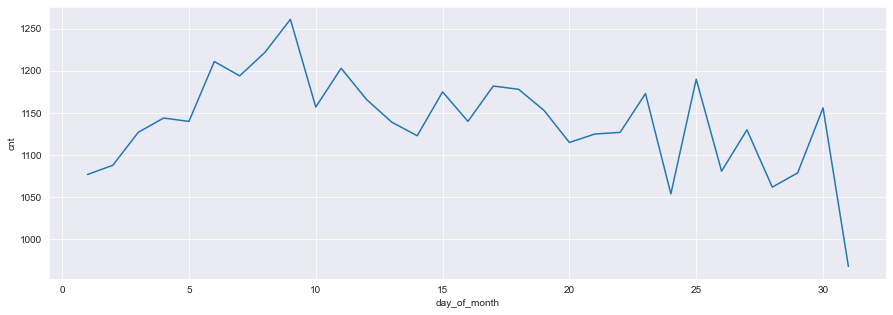

In [49]:
# artık lineplot'umuzu çizdirelim. (groupby ile grupladığımnız day_of_month x ekseninde olacak)

df_cnt =pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")) # groupby ile oluşturduğumuz dataframe'imizi df_cnt değişkenine atıyoruz.

plt.figure(figsize=(15, 5))
# sns.lineplot(data=df_cnt, x="day_of_month", y="cnt")

sns.lineplot(data=df_cnt, x="day_of_month", y="cnt") 

<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

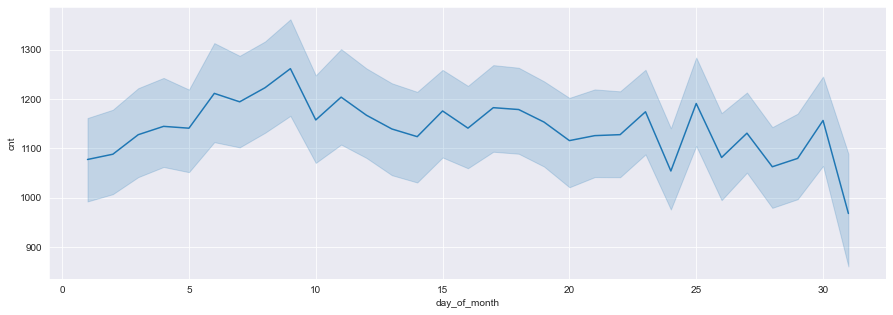

In [51]:
# with lineplot

pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="day_of_month", y="cnt")



day_of_month    1     2     3     4     5   ...    27    28    29    30   31
cnt           1077  1088  1128  1144  1141  ...  1131  1063  1080  1156  968

[1 rows x 31 columns]

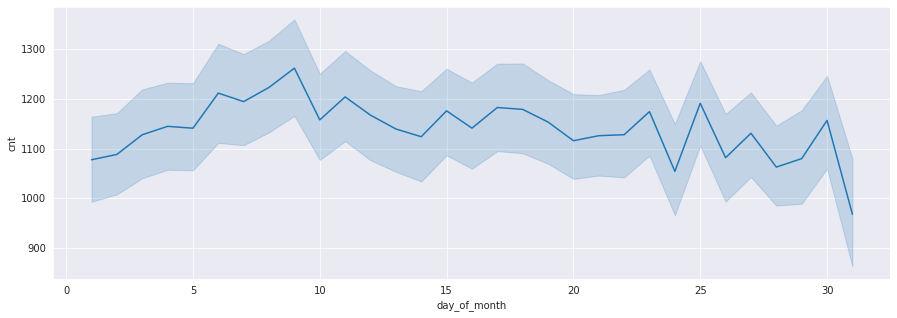

In [ ]:
#with lineplot


### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

<AxesSubplot:xlabel='year', ylabel='cnt'>

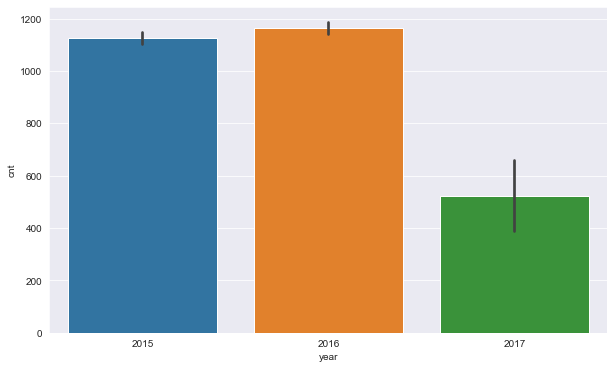

In [138]:
# with barplot

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year",y="cnt")

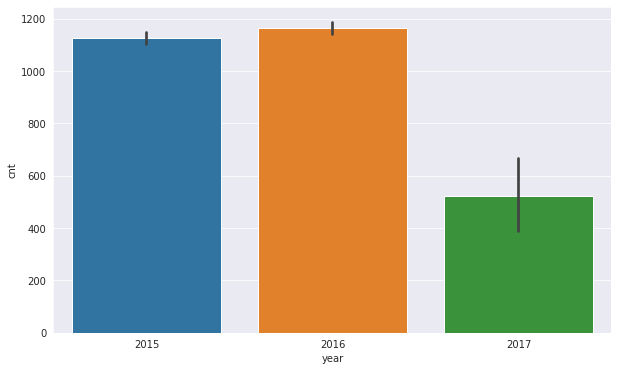

In [11]:
# with barplot


<AxesSubplot:xlabel='season', ylabel='cnt'>

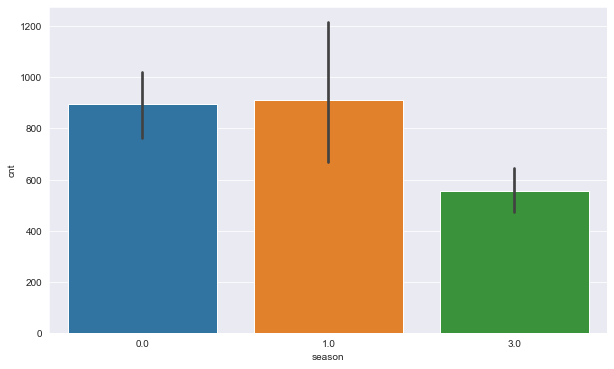

In [55]:
# with barplot

# benden tatil günlerinin verileri içerisinde mevsimlere göre cnt sayılarının grafiğini istiyor.
# önce tatil günlerinin True olduğu durumları dataframe'den çekerim ve çizdireceğim barplotta bu datayı kullanırım.

plt.figure(figsize=(10,6))

sns.barplot(data=df[df["is_holiday"]==1], x="season",y="cnt")

<AxesSubplot:xlabel='season', ylabel='cnt'>

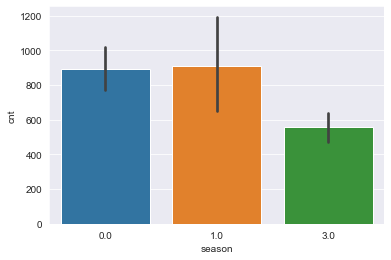

In [59]:
# is_holiday == 1 True olan yani tatil günlerindeki df'in verilerini çekip df_isholiday değişkenine atadım. 
# sns.barplot'ta data olarak bu değişkeni kullandım.

df_isholiday = df[df["is_holiday"]==1]

sns.barplot(data=df_isholiday, x="season",y="cnt")

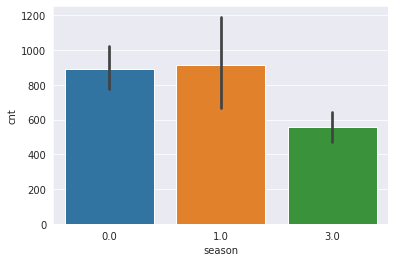

In [12]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [60]:
df.is_weekend.value_counts()

# benden bisiklet kiralanması durumunun haftasonu ve haftaiçine göre kıyasını istiyor. yani weekday ve weekend satır sayılarını karşılaşatıracağım. 
# weekend'in value'larına baktığımda 12444 satırda False döndüğünü yani weekday olduğunu, 
# 4970 satırda da weekend olduğunu görüyorum.
# demek ki is_weekend feature'unun value_count unu aldığımda elimde hem haftaiçi hem haftasonu sayıları olacak 
# ve ben bunu pie chart'ta gösterebileceğim.

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

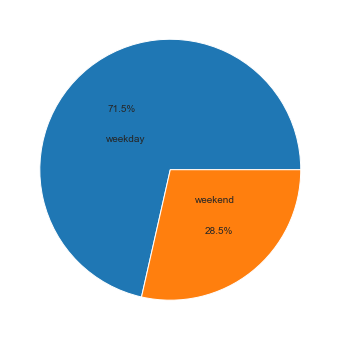

In [74]:
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(x = df.is_weekend.value_counts(), labels=["weekday","weekend"],
       labeldistance=0.3, autopct="%.1f%%");

# x = df.is_weekend.value_counts().values de olur

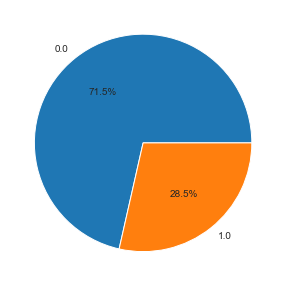

In [67]:
# C8301 Sam hocamın kodu:

plt.figure(figsize=(7,5))

x = df.is_weekend.value_counts().values
mylabels = df.is_weekend.value_counts().index
myexplode = [0, 0]

plt.pie(x, labels = mylabels, labeldistance=1.1, explode = myexplode, 
        startangle=0, autopct='%1.1f%%')
plt.show()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

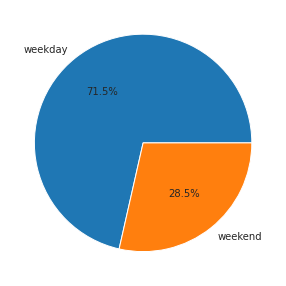

In [ ]:
# pie chart

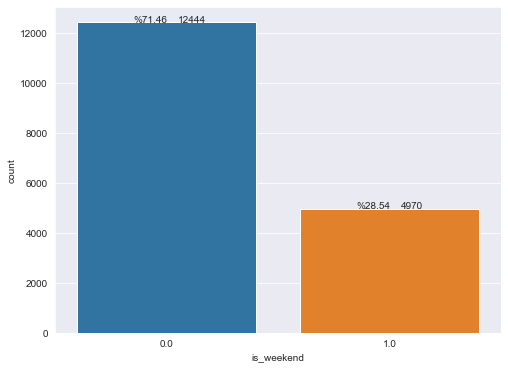

In [83]:
# with countplot
# C8316 Süleyman hocamın kodu:

fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(data=df, x="is_weekend", ax=ax)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.45, p.get_height()+1))
    ax.annotate("%"+str(round((p.get_height()/(df.is_weekend.count()))*100,2)), (p.get_x()+0.25, p.get_height()-5));

In [ ]:
# Sam hocamın kodu:

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x = "is_weekend", data = df)
for p in ax.patches:
    ax.annotate('%' + str(round((p.get_height()) / df.is_weekend.value_counts().sum() * 100, 2)) + " " + "-" + " " +
                str(p.get_height()), (p.get_x()+0.20, p.get_height()+200), fontsize = 13)
plt.show()

# iki ayrı annotate yerine tek bir annotate ile (yazdırılmasını istediği verileri art arda ekleyerek) rakamların gösterimini sağlamış.

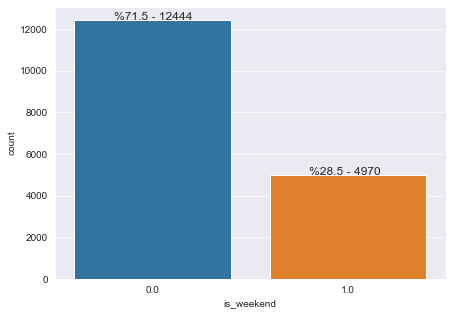

In [144]:
# Thomas hocamın kodu:

fig, ax = plt.subplots(figsize=(7,5))

ax = sns.countplot(x='is_weekend',data=df)

for bar in ax.patches: 
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(df),1)) +' - '+ str(bar.get_height() ), 
                    (bar.get_x()+0.2 , bar.get_height()+10) ,
                    size=12)

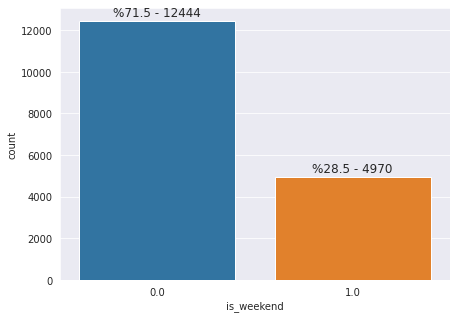

In [ ]:
# with countplot



### 16.Plot the distribution of weather code by seasons

<AxesSubplot:xlabel='weather_code', ylabel='count'>

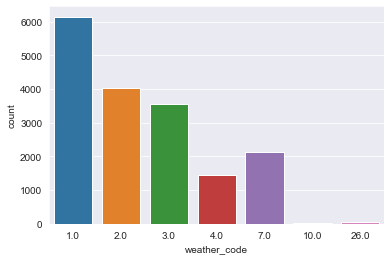

In [147]:
# with countplot

sns.countplot(x="weather_code", data=df)

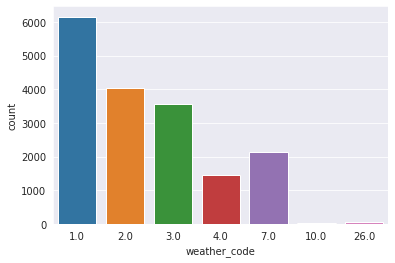

In [ ]:
# with countplot


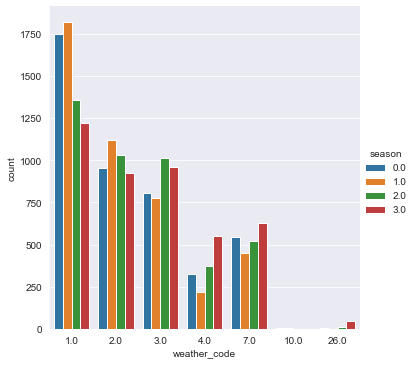

In [95]:
# with catplot

sns.catplot(x = "weather_code", data = df, kind = "count", hue="season");



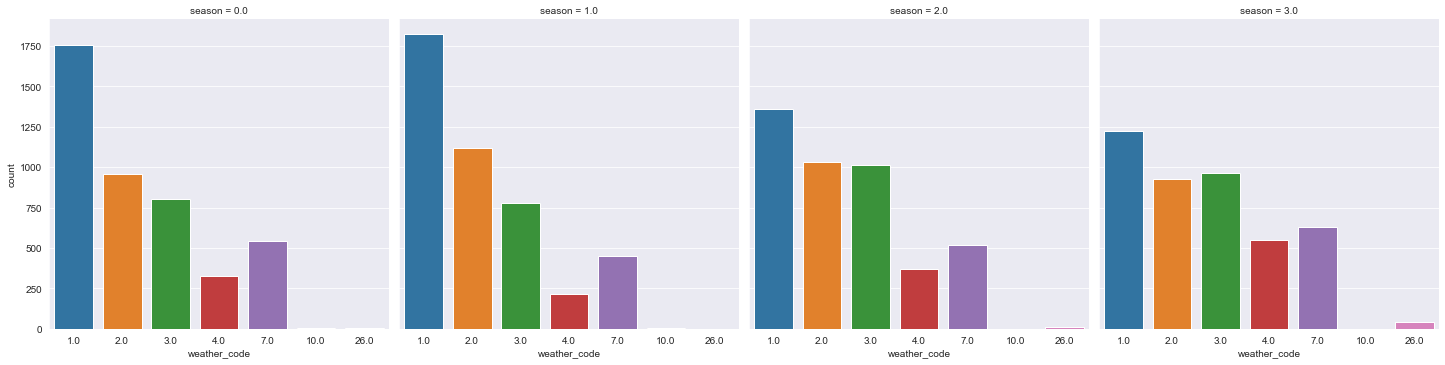

In [85]:
# with catplot

sns.catplot(x = "weather_code", data = df, col = "season", kind = "count");

# col = "season" ın hue="season" dan farkı: hue kategorileri bir axes'te gösterirken col tamamen ayırıyor yani column column gösteriyor.

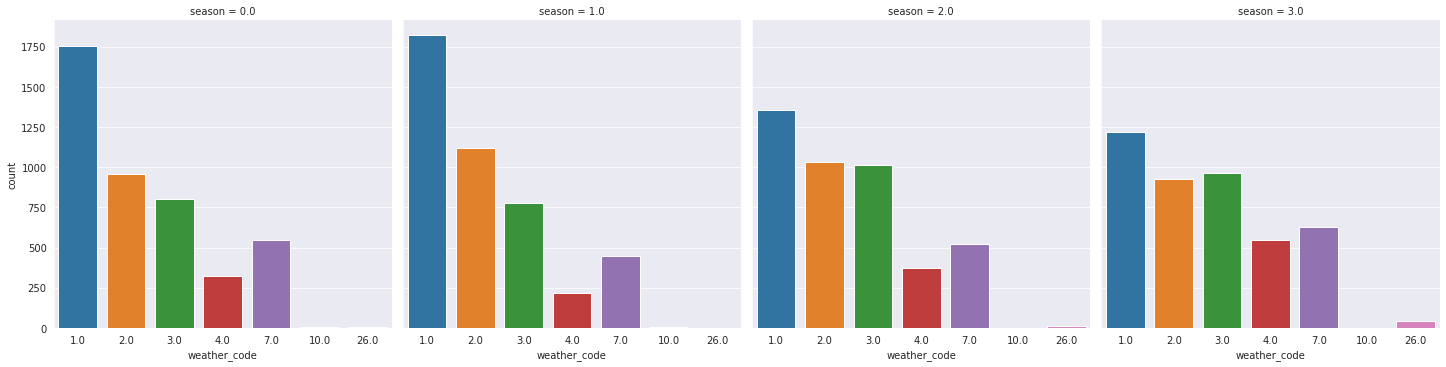

In [ ]:
# with catplot


### 17.Visulaize all the continuous variables with histogram and scatterplot

Text(0.5, 1.0, 'humidity')

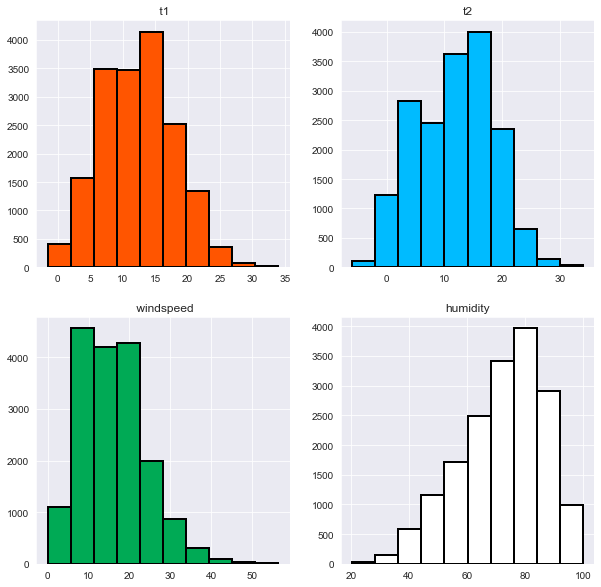

In [150]:
# matplotlip hist

fig,axes=plt.subplots(2,2, figsize=(10,10))

axes[0,0].hist(x="t1",data=df,edgecolor="black",linewidth=2,color='#FF5500')
axes[0,0].set_title(" t1")

axes[0,1].hist(x="t2",data=df,edgecolor="black",linewidth=2,color='#00BBFF')
axes[0,1].set_title("t2")

axes[1,0].hist(x="wind_speed",data=df,edgecolor="black",linewidth=2,color='#00AA55')
axes[1,0].set_title(" windspeed")

axes[1,1].hist(x="hum",data=df,edgecolor="black",linewidth=2,color='#FFFFFF')
axes[1,1].set_title("humidity")

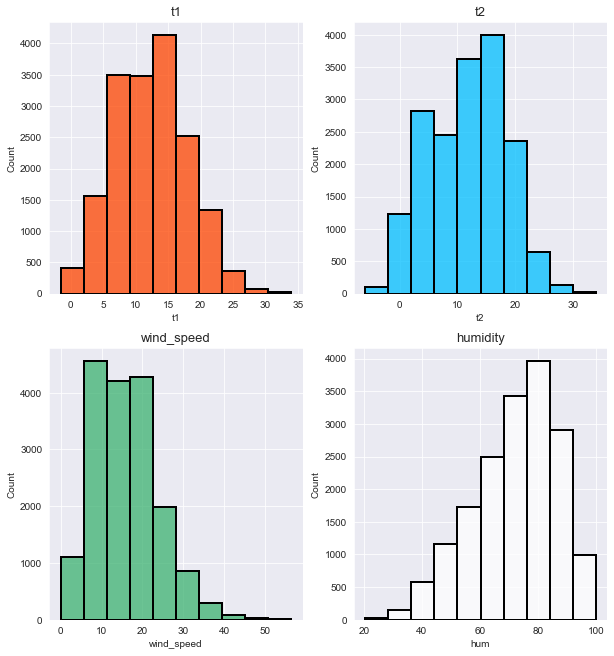

In [97]:
# seaborn ile Sam hocamın kodu:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,11))

sns.histplot(data=df, x ="t1", ax = ax[0][0], bins = 10, stat = "count", color = "orangered", edgecolor = "black", linewidth = 2).set_title("t1", fontsize = 13)
sns.histplot(data=df, x ="t2", ax = ax[0][1], bins = 10, stat = "count", color = "deepskyblue", edgecolor = "black", linewidth = 2).set_title("t2", fontsize = 13)
sns.histplot(data=df, x ="wind_speed", ax = ax[1][0], bins = 10, stat = "count", color = "mediumseagreen", edgecolor = "black", linewidth = 2).set_title("wind_speed", fontsize = 13)
sns.histplot(data=df, x ="hum", ax = ax[1][1], bins = 10, stat = "count",  color = "white", edgecolor = "black", linewidth = 2).set_title("humidity", fontsize = 13)
plt.show()

In [ ]:
# Emir hocanın kodu:

# matplotlip hist

fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))

axes[0][0].hist(df["t1"], bins = 10, color = "orangered", edgecolor = "black", linewidth = 2)
axes[0][1].hist(df["t2"], bins = 10, color = "deepskyblue", edgecolor = "black", linewidth = 2)
axes[1][0].hist(df["wind_speed"], bins = 10, color = "mediumseagreen", edgecolor = "black", linewidth = 2)
axes[1][1].hist(df["hum"], bins = 10, color = "White", edgecolor = "black", linewidth = 2)

axes[0][0].set_title("t1", fontsize = 13)
axes[0][1].set_title("t2", fontsize = 13)
axes[1][0].set_title("wind_speed", fontsize = 13)
axes[1][1].set_title("humidity", fontsize = 13)
plt.show()

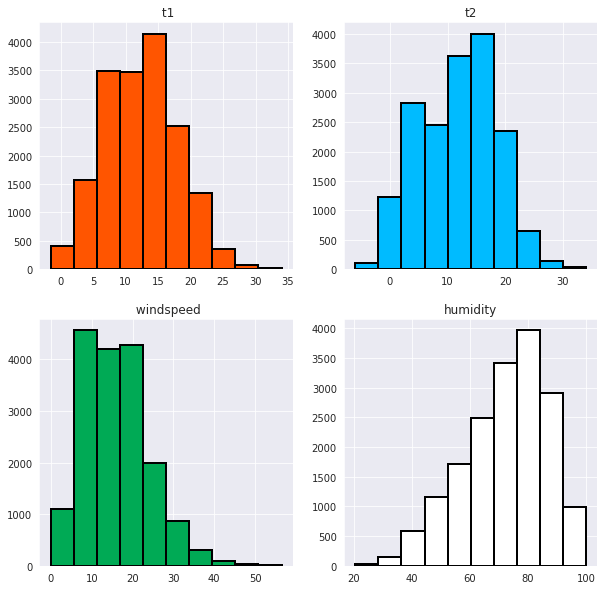

In [ ]:
# matplotlip hist


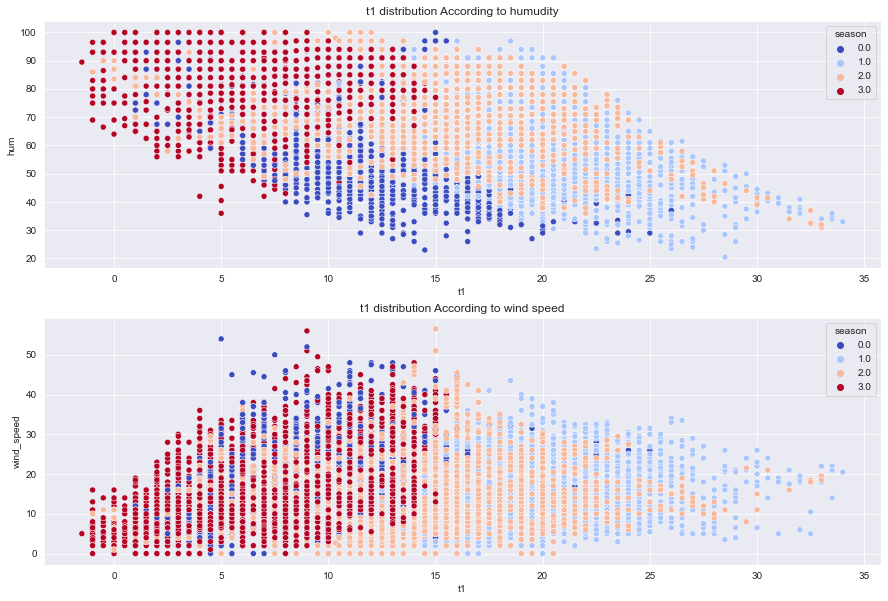

In [153]:
# matplotlib scatterplot

plt.figure(figsize=(15,10))

plt.subplot(211)
plt.title("t1 distribution According to humudity")
sns.scatterplot(x="t1",y="hum",data=df, hue='season',palette="coolwarm")

plt.subplot(212)
plt.title("t1 distribution According to wind speed")
sns.scatterplot(x="t1",y="wind_speed",data=df, hue='season',palette="coolwarm");

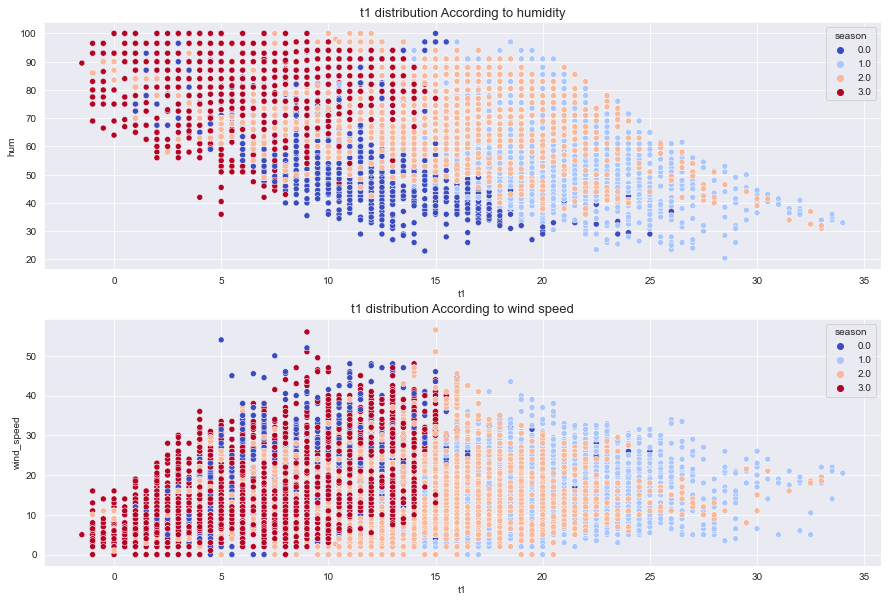

In [154]:
# Emir hocamın kodu:

# seaborn scatterplot
fig, ax = plt.subplots(2,1,figsize=(15,10))

sns.scatterplot(data = df, x = "t1", y = "hum", palette = "coolwarm", hue = "season", ax = ax[0]).set_title("t1 distribution According to humidity", fontsize = 13)
sns.scatterplot(data = df, x = "t1", y = "wind_speed", palette = "coolwarm", hue = "season", ax = ax[1]).set_title("t1 distribution According to wind speed", fontsize = 13);

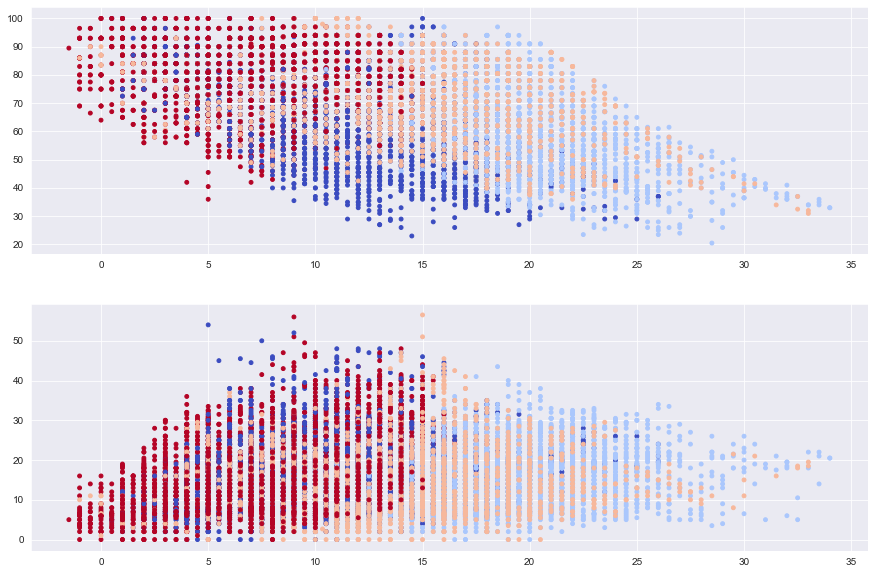

In [155]:
# Emir hocamın matplotllib çözümü:

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(data=df, x="t1", y="hum", c="season", cmap="coolwarm", s = 15)
plt.subplot(2,1,2)
plt.scatter(data=df, x="t1", y="wind_speed", c="season", cmap="coolwarm", s = 15);

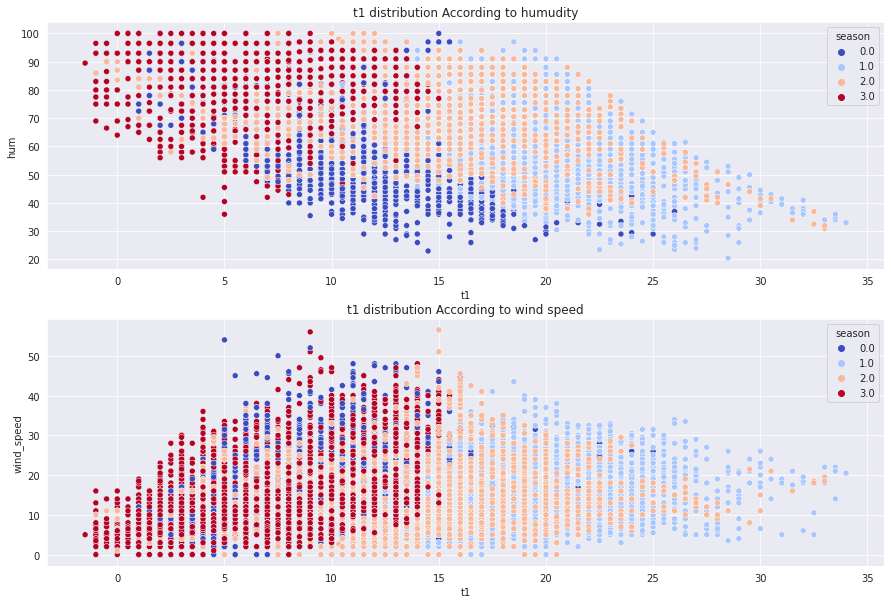

In [ ]:
# matplotlib scatterplot

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___